# Module

In [31]:
# required module
import numpy as np
from PIL import Image
from pylab import *

#torch
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms

In [32]:
#obtain the example training data
x = Image.open(
    r'data/data2fIm/input2d1.jpg').convert('L')
y = np.asarray(x.getdata(), dtype=np.float64).reshape((x.size[1], x.size[0]))
target_x = Image.open(
    r'data/label2fIm/target2l1.jpg').convert('L')
target_y = np.asarray(target_x.getdata(), dtype=np.float64).reshape(
    (target_x.size[1], target_x.size[0]))

#data
y1 = np.asarray(y, dtype=np.uint8)
y1_im = transforms.ToTensor()(y1).unsqueeze_(0)
print(y1_im.shape)
#label
target_y1 = np.asarray(target_y, dtype=np.uint8)
target_y1_im = transforms.ToTensor()(target_y1).unsqueeze_(0)
print(target_y1_im.shape)

torch.Size([1, 1, 128, 128])
torch.Size([1, 1, 128, 128])


## Visualization of data

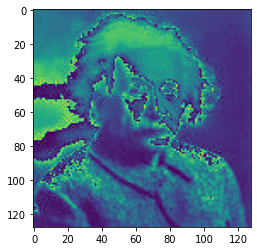

In [33]:
plt.imshow(y1)

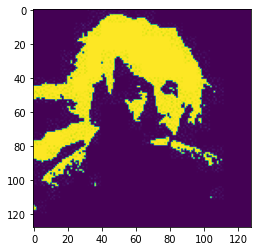

In [34]:
plt.imshow(target_y1)

# Model

In [35]:
#modeling with 16384 x 20 x 20 x 16384

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # input is last input 6, and output is 16, just 16, and kernel size is 5
        self.fc1 = nn.Linear(16384, 20)
        #input of 16*5*5, output is 120 just randomw
        self.fc2 = nn.Linear(20, 20)
        #input of last number 120, and 84 randome
        self.fc3 = nn.Linear(20, 16384)
        #output is 62*29*29  corrspond all the data.
        self.softmax =nn.Sigmoid()

    def forward(self, x):
        x = x.view(-1, 16384)            # -> n, 16384
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 120
        x = self.softmax(self.fc3(x))    # -> n, 52142
    
        return x
    
net = Net()

In [40]:
#devices, model, criterion, optimizer
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = Net().to(device)
criterion = nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr=10)

# Training

In [41]:
#data
inputs = y1_im
labels = target_y1_im.view(-1, 16384)[0]

print('Traning Start')
for epoch in range(200):  # loop over the dataset multiple times

    running_loss = 0.0

    # get the inputs; data is a list of [inputs, labels]

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(inputs)[0]

    loss = criterion(outputs,labels)
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.item()
    print(epoch,"iteration L= ",running_loss);

print('Finished Training')

train_acc = torch.sum(torch.round(outputs) == labels)/16384
print("Training Accuracy =",np.round(np.array(train_acc),2))

Traning Start
0 iteration L=  0.6923367977142334
1 iteration L=  0.6921589374542236
2 iteration L=  0.6919794082641602
3 iteration L=  0.6917979121208191
4 iteration L=  0.6916143298149109
5 iteration L=  0.6914297342300415
6 iteration L=  0.6912992596626282
7 iteration L=  0.6914547681808472
8 iteration L=  0.6914461851119995
9 iteration L=  0.6912466287612915
10 iteration L=  0.6910502910614014
11 iteration L=  0.6908566355705261
12 iteration L=  0.6906654238700867
13 iteration L=  0.6904759407043457
14 iteration L=  0.6902880072593689
15 iteration L=  0.6901012063026428
16 iteration L=  0.6899150609970093
17 iteration L=  0.689729630947113
18 iteration L=  0.6895443797111511
19 iteration L=  0.689359188079834
20 iteration L=  0.6891737580299377
21 iteration L=  0.6889880299568176
22 iteration L=  0.6888018250465393
23 iteration L=  0.6886148452758789
24 iteration L=  0.6884269714355469
25 iteration L=  0.6882382035255432
26 iteration L=  0.6880481839179993
27 iteration L=  0.6878569

## Training Result

torch.Size([1, 1, 128, 128])


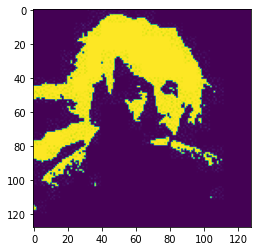

In [42]:
#labeling data
target1=labels.reshape([1,1,128,128])
print(target1.shape)
plt.imshow(target1[0][0].detach().cpu().numpy())

torch.Size([1, 1, 128, 128])


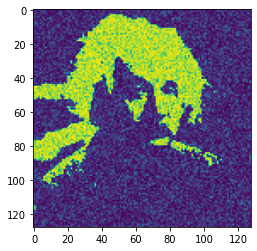

In [43]:
# trained data
outputs = net(inputs)
output1=outputs.reshape([1,1,128,128])
print(output1.shape)
plt.imshow(output1[0][0].detach().cpu().numpy())

# Validating Model

In [44]:
#obtain the example training data
x = Image.open(
    r'data/data2fIm/input2d2.jpg').convert('L')
y = np.asarray(x.getdata(), dtype=np.float64).reshape((x.size[1], x.size[0]))
target_x = Image.open(
    r'data/label2fIm/target2l2.jpg').convert('L')
target_y = np.asarray(target_x.getdata(), dtype=np.float64).reshape(
    (target_x.size[1], target_x.size[0]))

#data
y1 = np.asarray(y, dtype=np.uint8)
y1_im = transforms.ToTensor()(y1).unsqueeze_(0)
print(y1_im.shape)
#label
target_y1 = np.asarray(target_y, dtype=np.uint8)
target_y1_im = transforms.ToTensor()(target_y1).unsqueeze_(0)
print(target_y1_im.shape)

#labels
inputs = y1_im
labels = target_y1_im.view(-1, 16384)[0]

torch.Size([1, 1, 128, 128])
torch.Size([1, 1, 128, 128])


## Visualization

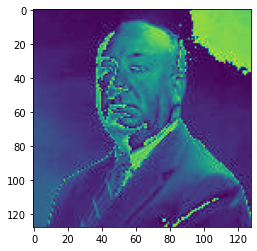

In [45]:
plt.imshow(y1)

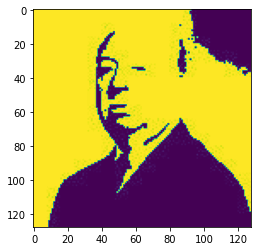

In [46]:
plt.imshow(target_y1)

## data1

torch.Size([1, 1, 128, 128])


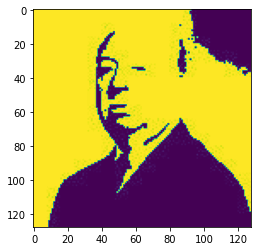

In [47]:
target1=labels.reshape([1,1,128,128])
print(target1.shape)
plt.imshow(target1[0][0].detach().cpu().numpy())

torch.Size([1, 1, 128, 128])


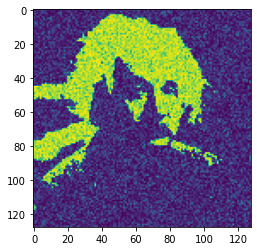

In [48]:
outputs = net(inputs)
output1=outputs.reshape([1,1,128,128])
print(output1.shape)
plt.imshow(output1[0][0].detach().cpu().numpy())